# FD004 Engine Data Analysis

Loading and exploring the NASA C-MAPSS FD004 dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# Define column names
setting_names = ['setting_1', 'setting_2', 'setting_3']

sensor_names = [
    "(Fan inlet temperature) (◦R)",
    "(LPC outlet temperature) (◦R)",
    "(HPC outlet temperature) (◦R)",
    "(LPT outlet temperature) (◦R)",
    "(Fan inlet Pressure) (psia)",
    "(bypass-duct pressure) (psia)",
    "(HPC outlet pressure) (psia)",
    "(Physical fan speed) (rpm)",
    "(Physical core speed) (rpm)",
    "(Engine pressure ratio) (P50/P2)",
    "(HPC outlet Static pressure) (psia)",
    "(Ratio of fuel flow to Ps30) (pps/psia)",
    "(Corrected fan speed) (rpm)",
    "(Corrected core speed) (rpm)",
    "(Bypass Ratio) ",
    "(Burner fuel-air ratio)",
    "(Bleed Enthalpy)",
    "(Required fan speed)",
    "(Required fan conversion speed)",
    "(High-pressure turbines Cool air flow)",
    "(Low-pressure turbines Cool air flow)"
]

columns = ['unit_number', 'time_cycles'] + setting_names + sensor_names

print(f"Total columns: {len(columns)}")
print(f"\nFirst few column names:")
for i, col in enumerate(columns[:8]):
    print(f"  {i+1}. {col}")

Total columns: 26

First few column names:
  1. unit_number
  2. time_cycles
  3. setting_1
  4. setting_2
  5. setting_3
  6. (Fan inlet temperature) (◦R)
  7. (LPC outlet temperature) (◦R)
  8. (HPC outlet temperature) (◦R)


In [3]:
# Load training data
train_df = pd.read_csv('CMaps/train_FD004.txt', sep=r'\s+', header=None, names=columns)

print(f"\nDataset shape: {train_df.shape}")
print(f"Number of engines: {train_df['unit_number'].nunique()}")
print(f"Total rows: {len(train_df)}")


Dataset shape: (61249, 26)
Number of engines: 249
Total rows: 61249


In [4]:
# Show first few rows
train_df.head(10)

,unit_number,time_cycles,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio) (P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
5,1,6,34.9996,0.8400,100.0,449.44,554.77,1352.87,1117.01,5.48,7.97,193.82,2222.77,8340.00,1.02,41.44,181.90,2387.87,8054.10,9.3346,0.02,330,2223,100.00,14.91,8.9057
6,1,7,0.0019,0.0001,100.0,518.67,641.83,1583.47,1393.89,14.62,21.58,552.45,2387.92,9050.50,1.30,46.94,520.48,2387.89,8127.92,8.3960,0.03,391,2388,100.00,38.93,23.4578
7,1,8,41.9981,0.8400,100.0,445.00,549.05,1344.16,1110.77,3.91,5.69,137.13,2211.92,8307.28,1.01,41.60,129.65,2387.97,8075.99,9.3679,0.02,329,2212,100.00,10.55,6.2787
8,1,9,42.0016,0.8400,100.0,445.00,549.55,1342.85,1101.67,3.91,5.70,138.02,2211.90,8307.81,1.02,41.44,129.65,2388.00,8071.13,9.3384,0.02,328,2212,100.00,10.63,6.3055
9,1,10,25.0019,0.6217,60.0,462.54,536.35,1251.91,1041.37,7.05,9.01,174.70,1915.23,8005.83,0.94,36.24,164.08,2028.13,7869.41,10.9141,0.02,305,1915,84.93,14.34,8.6119


In [5]:
# Filter data for engine ID 21
engine_21 = train_df[train_df['unit_number'] == 21]

print(f"\n=== Engine 21 Data ===")
print(f"Number of cycles: {len(engine_21)}")
print(f"First cycle: {engine_21['time_cycles'].min()}")
print(f"Last cycle (failure): {engine_21['time_cycles'].max()}")
print(f"\nEngine 21 failed at cycle: {engine_21['time_cycles'].max()}")


=== Engine 21 Data ===
Number of cycles: 227
First cycle: 1
Last cycle (failure): 227

Engine 21 failed at cycle: 227


In [6]:
# Display all data for engine 21
engine_21

,unit_number,time_cycles,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio) (P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
5303,21,1,35.0068,0.8400,100.0,449.44,555.35,1359.93,1126.30,5.48,7.99,194.59,2223.01,8347.12,1.03,41.65,183.11,2388.08,8069.62,9.2720,0.02,333,2223,100.00,15.05,9.0095
5304,21,2,10.0027,0.2508,100.0,489.05,604.20,1496.98,1297.55,10.52,15.48,395.60,2318.88,8774.77,1.26,45.18,372.51,2388.07,8134.61,8.6074,0.03,370,2319,100.00,28.66,17.1549
5305,21,3,20.0072,0.7000,100.0,491.19,607.28,1481.66,1245.62,9.35,13.63,334.95,2323.93,8717.27,1.08,44.23,316.44,2388.04,8064.85,9.1748,0.02,363,2324,100.00,24.53,14.8380
5306,21,4,0.0029,0.0000,100.0,518.67,641.71,1585.14,1395.89,14.62,21.60,555.66,2388.12,9060.17,1.30,47.34,524.31,2388.04,8134.80,8.3626,0.03,392,2388,100.00,39.15,23.4554
5307,21,5,10.0062,0.2500,100.0,489.05,604.10,1501.92,1311.58,10.52,15.48,396.87,2318.95,8783.97,1.26,45.23,373.22,2388.06,8134.57,8.5631,0.03,369,2319,100.00,28.82,17.3718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525,21,223,42.0040,0.8400,100.0,445.00,549.94,1365.77,1137.77,3.91,5.70,142.97,2212.42,8380.97,1.05,42.49,134.21,2388.52,8144.91,9.0729,0.02,334,2212,100.00,10.90,6.4829
5526,21,224,35.0074,0.8400,100.0,449.44,556.36,1375.50,1148.67,5.48,7.99,199.98,2223.66,8407.15,1.05,42.38,188.44,2388.80,8120.67,9.0878,0.02,336,2223,100.00,15.07,9.1128
5527,21,225,24.9984,0.6201,60.0,462.54,537.08,1267.39,1054.66,7.05,9.01,179.86,1915.84,8052.54,0.94,37.16,168.60,2028.79,7911.69,10.6813,0.02,309,1915,84.93,14.49,8.7323
5528,21,226,25.0063,0.6201,60.0,462.54,536.91,1275.69,1060.01,7.05,9.01,179.07,1915.83,8049.65,0.94,37.05,168.78,2028.80,7906.68,10.6578,0.02,307,1915,84.93,14.46,8.8721


In [7]:
# Show basic statistics for engine 21
engine_21.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_number,227.0,21.000000,0.000000,21.0000,21.00000,21.0000,21.00000,21.0000
time_cycles,227.0,114.000000,65.673435,1.0000,57.50000,114.0000,170.50000,227.0000
setting_1,227.0,24.302289,14.229204,0.0000,10.00510,25.0021,35.00740,42.0077
setting_2,227.0,0.584974,0.298810,0.0000,0.25105,0.7000,0.84000,0.8419
setting_3,227.0,94.008811,14.305761,60.0000,100.00000,100.0000,100.00000,100.0000
(Fan inlet temperature) (◦R),227.0,472.166167,25.450076,445.0000,449.44000,462.5400,491.19000,518.6700
(LPC outlet temperature) (◦R),227.0,578.350044,36.110989,535.9700,549.21500,555.6900,606.91000,642.8900
(HPC outlet temperature) (◦R),227.0,1414.916035,103.266973,1251.5100,1349.46000,1367.1900,1495.63500,1604.5700
(LPT outlet temperature) (◦R),227.0,1196.786432,114.380311,1035.9200,1120.26000,1133.5800,1298.60500,1416.4300
(Fan inlet Pressure) (psia),227.0,7.928282,3.448035,3.9100,5.48000,7.0500,10.52000,14.6200


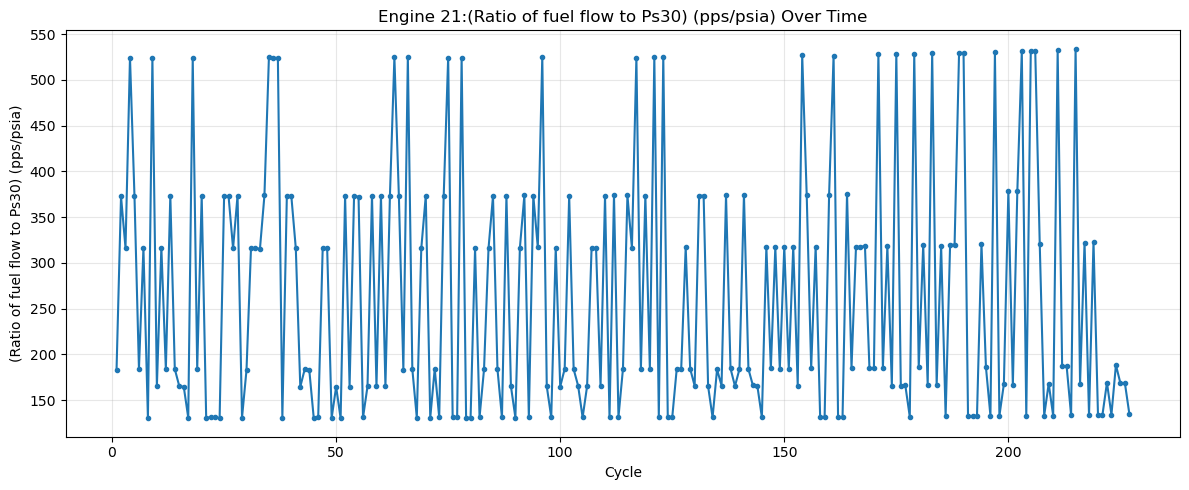

In [8]:
# Plot one sensor over time for engine 21
plt.figure(figsize=(12, 5))
plt.plot(engine_21['time_cycles'], engine_21['(Ratio of fuel flow to Ps30) (pps/psia)'], marker='o', markersize=3)
plt.xlabel('Cycle')
plt.ylabel('(Ratio of fuel flow to Ps30) (pps/psia)')
plt.title('Engine 21:(Ratio of fuel flow to Ps30) (pps/psia) Over Time')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
engine_20=train_df[train_df['unit_number']==20]
engine_5=train_df[train_df['unit_number']==5]

In [10]:
engine_20


,unit_number,time_cycles,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio) (P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
5058,20,1,42.0017,0.8414,100.0,445.00,549.56,1352.63,1121.03,3.91,5.72,138.48,2211.81,8318.72,1.02,41.92,129.99,2387.84,8082.36,9.3485,0.02,329,2212,100.00,10.56,6.4093
5059,20,2,25.0014,0.6200,60.0,462.54,537.08,1265.52,1048.19,7.05,9.03,175.30,1915.27,8006.73,0.94,36.64,164.27,2028.14,7876.29,10.9052,0.02,306,1915,84.93,14.19,8.5681
5060,20,3,0.0019,0.0017,100.0,518.67,642.45,1588.92,1412.57,14.62,21.61,553.86,2388.12,9050.36,1.30,47.69,521.69,2388.06,8137.44,8.4543,0.03,393,2388,100.00,38.92,23.2771
5061,20,4,42.0046,0.8402,100.0,445.00,549.54,1350.78,1125.10,3.91,5.71,138.42,2211.88,8319.55,1.02,41.84,130.91,2387.91,8081.04,9.3689,0.02,332,2212,100.00,10.70,6.3689
5062,20,5,19.9986,0.7010,100.0,491.19,607.06,1481.01,1248.83,9.35,13.66,334.26,2323.96,8716.36,1.08,44.19,314.62,2388.12,8060.10,9.2376,0.02,364,2324,100.00,24.45,14.7702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,20,241,10.0021,0.2519,100.0,489.05,605.70,1514.10,1328.07,10.52,15.50,393.15,2319.19,8830.14,1.26,46.09,370.24,2388.43,8172.18,8.7363,0.03,373,2319,100.00,28.08,17.0067
5299,20,242,41.9983,0.8400,100.0,445.00,550.41,1366.70,1146.40,3.91,5.72,138.66,2212.67,8378.22,1.02,42.87,130.19,2388.77,8129.84,9.4379,0.02,333,2212,100.00,10.51,6.2721
5300,20,243,0.0007,0.0013,100.0,518.67,643.45,1604.04,1422.29,14.62,21.61,551.27,2388.20,9113.75,1.30,48.15,519.87,2388.17,8180.66,8.5514,0.03,396,2388,100.00,38.39,23.2075
5301,20,244,0.0026,0.0000,100.0,518.67,643.33,1601.18,1432.92,14.62,21.61,551.07,2388.22,9110.54,1.30,48.26,519.85,2388.10,8181.75,8.5054,0.03,396,2388,100.00,38.46,23.0696


In [11]:
engine_5

,unit_number,time_cycles,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio) (P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
1201,5,1,10.0014,0.2500,100.0,489.05,605.16,1495.18,1313.85,10.52,15.49,394.10,2318.95,8765.17,1.26,45.50,371.35,2388.17,8117.05,8.6631,0.03,369,2319,100.00,28.52,17.1688
1202,5,2,35.0021,0.8403,100.0,449.44,556.01,1362.30,1130.14,5.48,8.00,194.53,2222.73,8341.33,1.02,42.09,183.09,2387.87,8050.68,9.3478,0.02,333,2223,100.00,14.75,8.9903
1203,5,3,42.0061,0.8400,100.0,445.00,549.76,1354.68,1121.03,3.91,5.71,138.34,2211.66,8308.01,1.02,42.13,130.68,2387.65,8074.99,9.3953,0.02,330,2212,100.00,10.63,6.3188
1204,5,4,24.9991,0.6200,60.0,462.54,537.19,1265.86,1041.95,7.05,9.02,175.76,1915.12,8009.58,0.94,36.76,164.68,2027.98,7863.62,10.9364,0.02,307,1915,84.93,14.16,8.4967
1205,5,5,24.9991,0.6200,60.0,462.54,536.95,1269.30,1043.15,7.05,9.03,174.89,1915.21,8000.11,0.94,36.88,165.06,2028.08,7863.91,10.9334,0.02,308,1915,84.93,14.36,8.5399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,5,189,42.0064,0.8400,100.0,445.00,550.48,1368.79,1145.17,3.91,5.72,139.61,2212.97,8388.56,1.02,42.61,130.38,2389.13,8150.76,9.4508,0.02,333,2212,100.00,10.52,6.3349
1390,5,190,25.0011,0.6200,60.0,462.54,537.10,1268.80,1061.82,7.05,9.03,174.72,1916.38,8068.81,0.94,37.34,164.28,2029.30,7922.33,11.0187,0.02,310,1915,84.93,14.06,8.4474
1391,5,191,35.0022,0.8411,100.0,449.44,556.57,1380.88,1141.91,5.48,8.01,193.84,2224.18,8424.28,1.02,42.38,183.12,2389.39,8131.67,9.4143,0.02,336,2223,100.00,14.79,8.9248
1392,5,192,35.0066,0.8417,100.0,449.44,557.24,1378.72,1143.91,5.48,8.01,194.12,2224.20,8428.67,1.02,42.42,182.66,2389.46,8127.58,9.3749,0.02,338,2223,100.00,14.65,8.7800


In [12]:
failure_20=engine_20['time_cycles']

In [13]:
failure_20

5058      1
5059      2
5060      3
5061      4
5062      5
       ... 
5298    241
5299    242
5300    243
5301    244
5302    245
Name: time_cycles, Length: 245, dtype: int64

In [15]:
failure_5=engine_5['time_cycles']

In [16]:
failure_5

1201      1
1202      2
1203      3
1204      4
1205      5
       ... 
1389    189
1390    190
1391    191
1392    192
1393    193
Name: time_cycles, Length: 193, dtype: int64

In [23]:
train_df.columns[20]

'(Burner fuel-air ratio)'

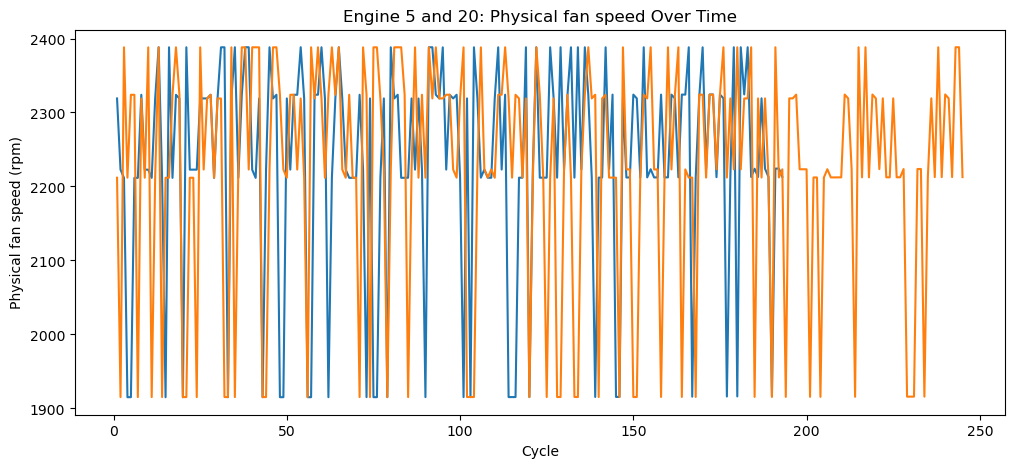

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(engine_5['time_cycles'], engine_5['(Physical fan speed) (rpm)'])
plt.plot(engine_20['time_cycles'], engine_20['(Physical fan speed) (rpm)'])
plt.xlabel('Cycle')
plt.ylabel('Physical fan speed (rpm)')
plt.title('Engine 5 and 20: Physical fan speed Over Time')
plt.show()